In [8]:
from torch import nn, tensor

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(3, 4)
        self.output = nn.Linear(4, 1)
        self.relu = nn.ReLU();

    def forward(self, x):
        output = self.hidden(x)
        output = self.relu(output)
        return self.output(output)

# Model description

## Layers:

This model has two layers:

1. A hidden layer with 4 neurons and a ReLU activation function.
2. An output layer with 1 neuron.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv('static/car_data.csv', usecols=['combination_mpg', 'fuel_type', 'cylinders', 'year'])
data.dropna(inplace=True)

label_encoder = LabelEncoder()
data['fuel_type'] = label_encoder.fit_transform(data['fuel_type'])

data = data.astype('float32')

X = data[['fuel_type', 'cylinders', 'year']].values
y = data['combination_mpg'].values

from torch import float32

# Split into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors after splitting
train_X = tensor(train_X, dtype=float32)
test_X = tensor(test_X, dtype=float32)
train_y = tensor(train_y, dtype=float32).view(-1, 1)
test_y = tensor(test_y, dtype=float32).view(-1, 1)


# Data

1. Load data using pands package, split into two clusters, half for training, half for testing my model after it.
2. Pick only useful columns
3. Parse from DataFrame to Tensor

## NOTE:
We must transform/cast all fields to digital type, so we can cast the DataFrame to a Tensor.
Why do all that ? We can only use tensors to train a model with torch. 

In [9]:
from torch.optim import SGD

model = MyModel()
optimizer = SGD(model.parameters(), lr=0.001)

epochs = 100
for i in range(epochs):
    model.train()

    output = model(train_X)
    loss = (train_y - output).pow(2).sum()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Training

1. Instanciate my model + define SGD (gradient descent) as my function optimizer
2. Precise number of loops (epochs)
3. Activate training mode
4. Pass trough my nn layers using my inputs
5. Calculate the loss
6. Zero grad my optimizer so i can reduce the inflation of my cached weights
7. Backward my loss to compute the gradient of the loss with respect to each weight in the model.
8. Once the gradients are computed, the optimizer (e.g., SGD) uses these gradients to adjust the weights in a direction that minimizes the loss. This step is performed by calling optimizer.step(), which moves each parameter by an amount proportional to its gradient.

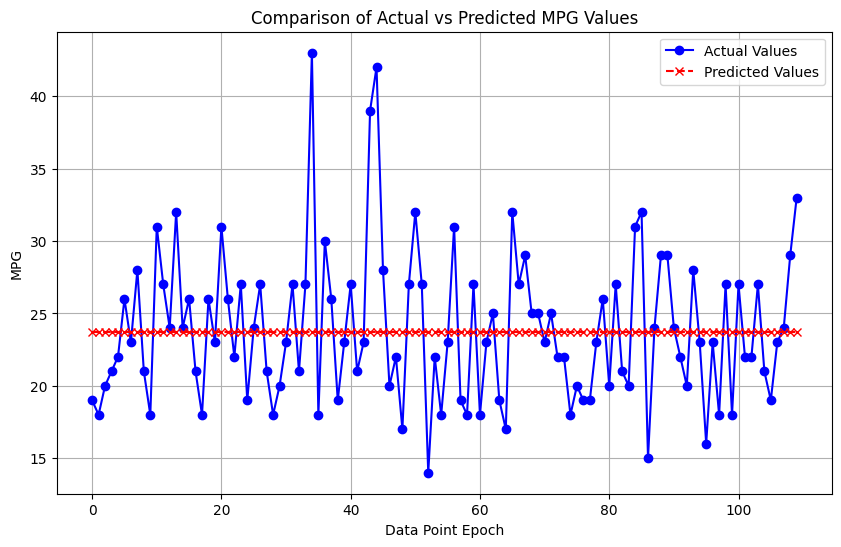

In [10]:
from torch import no_grad
import matplotlib.pyplot as plt

criterion = nn.MSELoss()
model.eval()
# Make predictions on test data
with no_grad():
    test_predictions = model(test_X)

# # Convert predictions and actual values to CPU (if needed) and detach from the computation graph
test_predictions = test_predictions.cpu().tolist()
test_actuals = test_y.cpu().tolist()

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_actuals, label='Actual Values', marker='o', linestyle='-', color='b')
plt.plot(test_predictions, label='Predicted Values', marker='x', linestyle='--', color='r')

plt.xlabel("Data Point Epoch")
plt.ylabel("MPG")
plt.title("Comparison of Actual vs Predicted MPG Values")
plt.legend()
plt.grid(True)
plt.show()